## Question 1

#### Abdallah Chidjou
#### Citation: (source of help: Lecture note, googling in general, stackoverflow, and chatgpt)

In [36]:
import pandas as pd

In [29]:
# Assuming the txt file is delimited by whitespace or commas
df = pd.read_csv('Occupation.txt', delimiter='|')
print(df)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [30]:
# 2. Write a python script which computes the median of the age variable for each occupation.
median_ages = df.groupby('occupation')['age'].median()

# Print the median ages for each occupation
print(median_ages)


occupation
administrator    37.0
artist           30.0
doctor           45.0
educator         42.0
engineer         36.0
entertainment    25.0
executive        38.5
healthcare       44.5
homemaker        32.0
lawyer           34.0
librarian        39.0
marketing        36.0
none             26.0
other            32.0
programmer       30.0
retired          63.0
salesman         34.0
scientist        37.0
student          21.0
technician       30.0
writer           36.0
Name: age, dtype: float64


In [31]:
# 3. Calculate the male ratio per occupation
def male_ratio(group):
    return (group['gender'] == 'M').sum() / len(group)

male_ratios = df.groupby('occupation', group_keys=False).apply(male_ratio).sort_values(ascending=False)

# Display the male ratios per occupation
print(male_ratios)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


/var/folders/2d/9508nsz51vx2htl27dgrdbfc0000gn/T/ipykernel_73678/698576823.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  male_ratios = df.groupby('occupation', group_keys=False).apply(male_ratio).sort_values(ascending=False)


In [32]:
# 4. For each occupation, calculate the 90% interval for the mean age.
def age_90_interval(group):
    sorted_ages = group['age'].sort_values()
    lower = sorted_ages.quantile(0.025)
    upper = sorted_ages.quantile(0.975)
    return lower, upper

age_intervals = df.groupby('occupation').apply(age_90_interval)

# Display the 90% intervals for mean age per occupation
print(age_intervals)

occupation
administrator       (22.0, 59.14999999999999)
artist           (19.675, 45.974999999999994)
doctor                         (28.15, 62.05)
educator                         (25.0, 60.0)
engineer            (22.0, 61.69999999999999)
entertainment                 (15.85, 49.575)
executive         (24.325, 60.47499999999998)
healthcare                     (23.5, 58.625)
homemaker                       (20.45, 48.8)
lawyer                         (22.65, 52.45)
librarian                       (25.25, 58.5)
marketing                        (24.0, 55.0)
none                             (11.4, 51.0)
other               (18.6, 55.39999999999999)
programmer                     (21.0, 55.625)
retired            (52.95, 72.02499999999999)
salesman                      (18.825, 63.25)
scientist                       (23.75, 47.5)
student                        (13.875, 35.0)
technician        (21.65, 51.749999999999986)
writer             (18.3, 55.599999999999994)
dtype: object


/var/folders/2d/9508nsz51vx2htl27dgrdbfc0000gn/T/ipykernel_73678/1287579221.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_intervals = df.groupby('occupation').apply(age_90_interval)


## Question 2

In [33]:
import numpy as np
# Calculate the alpha-trimmed standard deviation
def alpha_trimmed_std(x, alpha):
    n = len(x)
    x_sorted = np.sort(x)
    n_alpha = int(np.floor(alpha * n))
    trimmed_x = x_sorted[n_alpha:n - n_alpha]
    T_alpha = np.mean(trimmed_x)
    N_alpha = len(trimmed_x)
    S_alpha = np.sqrt(np.sum((trimmed_x - T_alpha) ** 2) / (N_alpha - 1))
    return S_alpha

# Apply the function to the age variable in the data
df['age_trimmed_std'] = df.groupby('occupation')['age'].transform(lambda x: alpha_trimmed_std(x, alpha=0.1))

# Display the alpha-trimmed standard deviation for each occupation
age_trimmed_std_per_occupation = df.groupby('occupation')['age_trimmed_std'].first()
print(age_trimmed_std_per_occupation)

occupation
administrator     8.532123
artist            7.467684
doctor           12.501428
educator          8.142779
engineer          7.820245
entertainment     8.494851
executive         7.499333
healthcare        9.279838
homemaker        10.737119
lawyer            9.298148
librarian         8.717728
marketing         7.765503
none             13.757826
other             7.962148
programmer        6.495174
retired           4.114829
salesman         10.178409
scientist         5.322906
student           3.177767
technician        8.223412
writer            9.368338
Name: age_trimmed_std, dtype: float64


## Question 3

In [48]:
import string
from collections import Counter
# Load the text file as a DataFrame
df = pd.read_csv('Cacher_in_the_rye.txt', delimiter='|', header=None, names=['text'])


In [49]:
# Convert the text to a single string
text = ' '.join(df['text'])

# Clean the text by removing punctuation and converting it to lowercase
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

# Split the text into words
words = text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Convert the word counts to a list of tuples
word_count_list = list(word_counts.items())

# Print the output
for word, count in word_count_list:
    print((word, count))


('why', 1)
('oh', 1)
('well', 1)
('its', 2)
('a', 4)
('long', 1)
('story', 1)
('sir', 1)
('i', 9)
('mean', 2)
('pretty', 1)
('complicated', 1)
('didnt', 1)
('feel', 1)
('like', 1)
('going', 1)
('into', 1)
('the', 5)
('whole', 1)
('thing', 1)
('with', 6)
('him', 1)
('he', 2)
('wouldnt', 1)
('have', 1)
('understood', 1)
('it', 4)
('anyway', 1)
('wasnt', 1)
('up', 2)
('his', 1)
('alley', 1)
('at', 1)
('all', 3)
('one', 2)
('of', 3)
('biggest', 1)
('reasons', 1)
('left', 1)
('elkton', 2)
('hills', 2)
('was', 5)
('because', 1)
('surrounded', 1)
('by', 1)
('phonies', 1)
('thats', 1)
('they', 3)
('were', 1)
('coming', 1)
('in', 2)
('goddam', 2)
('window', 1)
('for', 3)
('instance', 2)
('had', 2)
('this', 1)
('headmaster', 1)
('mr', 1)
('haas', 2)
('that', 4)
('phoniest', 1)
('bastard', 1)
('ever', 1)
('met', 1)
('my', 2)
('life', 1)
('ten', 1)
('times', 1)
('worse', 1)
('than', 1)
('old', 4)
('thurmer', 1)
('on', 1)
('sundays', 1)
('went', 1)
('around', 1)
('shaking', 1)
('hands', 2)
('everyb

## Question 4

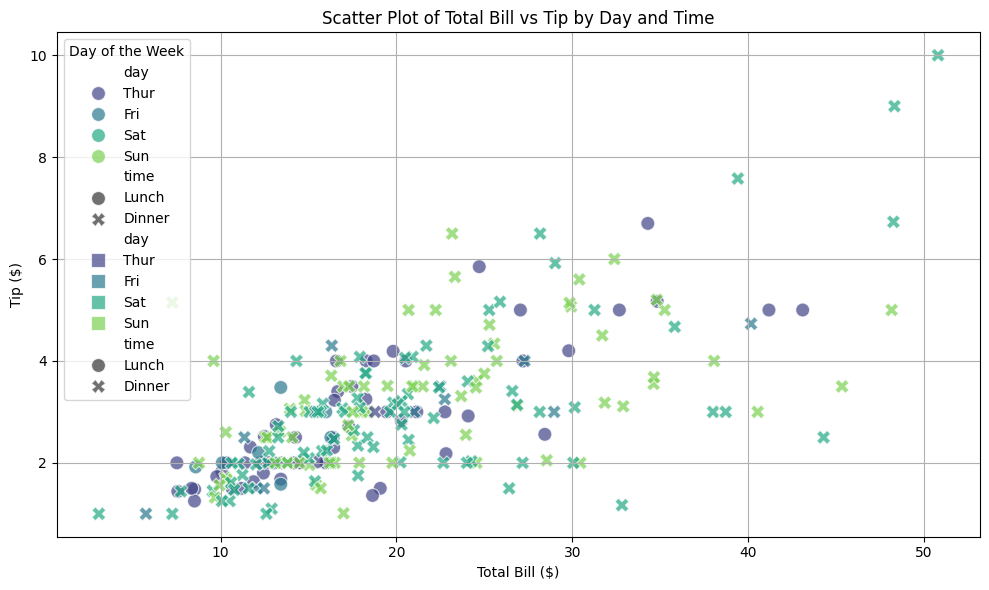

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'tips' dataset
tips_data = sns.load_dataset("tips")

# Define the marker styles for lunch and dinner
marker_styles = {'Lunch': 'o', 'Dinner': 's'}

# Create a scatter plot for each combination of day and time
plt.figure(figsize=(10, 6))
for time, marker in marker_styles.items():
    sns.scatterplot(
        data=tips_data[tips_data['time'] == time],
        x='total_bill',
        y='tip',
        hue='day',
        style='time',
        marker=marker,
        s=100,  # marker size
        palette='viridis',
        alpha=0.7,
        edgecolor='w'
    )

# Add labels for x-axis, y-axis, and title
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Scatter Plot of Total Bill vs Tip by Day and Time")

# Add a legend to indicate the day of the week
plt.legend(title='Day of the Week')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
